In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

In [2]:
# import data

data = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/datasampel/fkrtl_not_transformation.csv')

C:\Users\WIN10\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.drop(['Unnamed: 0', 'fkrtl-tanggal datang', 'FKRTL-ID Kunjungan', 'Nomor Peserta', 'fkrtl-tanggal pulang',
           'FKRTL-Provinsi Faskes', 'FKRTL-Kab/Kota Faskes', 'FKRTL-Provinsi Faskes Perujuk', 'FKRTL-Kab/Kota Faskes Perujuk', 
           'FKRTL-Kepemilikan Faskes Perujuk', 'FKRTL-Jenis Faskes Perujuk', 'FKRTL-Tipe Faskes Perujuk', 'Segmen Peserta yang Terdaftar', 
           'Kepemilikan Faskes yang Terdaftar', 'Jenis Faskes yang Terdaftar', 'Provinsi Peserta Terdaftar', 'Kab/Kota Peserta Terdaftar', 'fkrtl-Year',
          'FKRTL-Kode dan Nama Diagnosis Masuk', 'FKRTL-Kode dan Nama Diagnosis Sekunder', 'FKRTL-Kode dan Nama Diagnosis Primer', 'Status Kawin', 'Hubungan Keluarga', 'kategori umur',
          'fkrtl-Month', 'fkrtl-Hari Kunjungan', 'provinsi perujuk sama?', 'kab/kota perujuk sama?'], axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906905 entries, 0 to 906904
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Hasil Rujukan FKTP?       906905 non-null  object
 1   fkrtl-Lama Kunjungan      906905 non-null  int64 
 2   fkrtl-Weekend?            906905 non-null  int64 
 3   fkrtl-Quarter             906905 non-null  int64 
 4   FKRTL-Kepemilikan Faskes  906905 non-null  object
 5   FKRTL-Jenis Faskes        906905 non-null  object
 6   FKRTL-Tipe Faskes         906905 non-null  object
 7   FKRTL-Tingkat Layanan     906905 non-null  object
 8   FKRTL-Segmen Peserta      906905 non-null  object
 9   FKRTL-Kelas Rawat         906905 non-null  object
 10  FKRTL-Status Pulang       906905 non-null  object
 11  FKRTL-Biaya Tagih         906905 non-null  int64 
 12  FKRTL-Biaya Verifikasi    906905 non-null  int64 
 13  Kelas Rawat Peserta       906905 non-null  object
 14  Jeni

In [5]:
print("The number of numerical variables in the dataset : {}".format(data.select_dtypes(include=[np.number]).shape[1]))
print("The number of categorical variables in the dataset : {}".format(data.select_dtypes(exclude=[np.number]).shape[1]))

The number of numerical variables in the dataset : 6
The number of categorical variables in the dataset : 10


In [6]:
data_num = data.select_dtypes(include=[np.number])
data_cat = data.select_dtypes(exclude=[np.number])

In [7]:
data_cat.to_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/datasampel/FKRTL MCA PCA data category only.csv')

## **Dimensionality Reduction with MCA**

In [8]:
import prince
mca = prince.MCA(n_components=5, n_iter=3, copy=True, check_input=True, engine='auto', random_state=42)

In [9]:
mca = mca.fit(data_cat)

In [10]:
mca.eigenvalues_

[0.22957349312695347,
 0.2029335303662458,
 0.19890341953718577,
 0.1986259165889822,
 0.17139569922968778]

In [11]:
mca.total_inertia_

5.7

In [12]:
mca.explained_inertia_

[0.040276051425785844,
 0.03560237374846746,
 0.03489533676090697,
 0.03484665203315169,
 0.030069420917489365]

In [13]:
final_component = mca.transform(data_cat)

In [14]:
from numpy.core.defchararray import add

final_component = final_component.assign(new=add('', np.arange(1, len(final_component) + 1).astype(str)))

In [15]:
final_component

,0,1,2,3,4,new
0,-0.482193,-1.314366,-0.139377,0.234796,-0.534846,1
1,0.575586,-0.790547,-0.406820,0.198746,-2.191210,2
2,-0.208762,-0.135072,-0.244325,0.042749,-1.485076,3
3,1.121162,-1.119388,-0.642665,0.297018,-0.591111,4
4,-0.482193,-1.314366,-0.139377,0.234796,-0.534846,5
...,...,...,...,...,...,...
906900,-0.804672,-0.395274,0.146022,0.045020,0.129247,906901
906901,-0.537710,0.208135,0.074359,-0.067534,-0.034734,906902
906902,-0.804672,-0.395274,0.146022,0.045020,0.129247,906903
906903,0.801939,-0.377441,-0.588152,0.182224,-0.235499,906904


In [16]:
final_component.rename(columns = {0 : 'first_component_mca', 1 : 'second_component_mca', 2 : 'third_component_mca', 3:'fourth_component_mca', 4:'fifth_component_mca'}, inplace = True)

In [17]:
final_component

,first_component_mca,second_component_mca,third_component_mca,fourth_component_mca,fifth_component_mca,new
0,-0.482193,-1.314366,-0.139377,0.234796,-0.534846,1
1,0.575586,-0.790547,-0.406820,0.198746,-2.191210,2
2,-0.208762,-0.135072,-0.244325,0.042749,-1.485076,3
3,1.121162,-1.119388,-0.642665,0.297018,-0.591111,4
4,-0.482193,-1.314366,-0.139377,0.234796,-0.534846,5
...,...,...,...,...,...,...
906900,-0.804672,-0.395274,0.146022,0.045020,0.129247,906901
906901,-0.537710,0.208135,0.074359,-0.067534,-0.034734,906902
906902,-0.804672,-0.395274,0.146022,0.045020,0.129247,906903
906903,0.801939,-0.377441,-0.588152,0.182224,-0.235499,906904


## **Dimensionality Reduction with PCA**

### Correlation

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = data_num.corr()
# corrMatrix
corrMatrix.style.background_gradient(cmap='coolwarm')

,fkrtl-Lama Kunjungan,fkrtl-Weekend?,fkrtl-Quarter,FKRTL-Biaya Tagih,FKRTL-Biaya Verifikasi,Umur
fkrtl-Lama Kunjungan,1.000000,0.068292,-0.010456,0.444128,0.444656,-0.038407
fkrtl-Weekend?,0.068292,1.000000,0.002431,0.067556,0.067602,-0.045916
fkrtl-Quarter,-0.010456,0.002431,1.000000,-0.007329,-0.007530,0.006011
FKRTL-Biaya Tagih,0.444128,0.067556,-0.007329,1.000000,0.998928,-0.024471
FKRTL-Biaya Verifikasi,0.444656,0.067602,-0.007530,0.998928,1.000000,-0.024460
Umur,-0.038407,-0.045916,0.006011,-0.024471,-0.024460,1.000000


In [19]:
# drop atribut "Biaya verifikasi"
# Load data set
data_num.drop(['FKRTL-Biaya Verifikasi'], axis=1, inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
from sklearn.preprocessing import MinMaxScaler
# normalizing the data
X_std = MinMaxScaler(feature_range=(0, 1)).fit_transform(data_num)

covariance matrix

In [25]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 2.62563293e-05  1.19671142e-04 -2.02110594e-05  2.84242195e-05
   2.83808509e-05 -3.84308575e-05]
 [ 1.19671142e-04  1.16950406e-01  3.13610721e-04  2.88554776e-04
   2.87967773e-04 -3.06627847e-03]
 [-2.02110594e-05  3.13610721e-04  1.42310501e-01 -3.45304640e-05
  -3.53835731e-05  4.42832061e-04]
 [ 2.84242195e-05  2.88554776e-04 -3.45304640e-05  1.56000568e-04
   1.55410933e-04 -5.96847617e-05]
 [ 2.83808509e-05  2.87967773e-04 -3.53835731e-05  1.55410933e-04
   1.55155909e-04 -5.94958644e-05]
 [-3.84308575e-05 -3.06627847e-03  4.42832061e-04 -5.96847617e-05
  -5.94958644e-05  3.81326909e-02]]


In [26]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[ 1.33177201e-04 -1.03761904e-03  8.88172307e-04 -1.36112974e-01
   9.90691714e-01 -1.14107149e-03]
 [-1.18854311e-02 -9.99168234e-01 -3.88420649e-02  3.54927238e-03
  -5.22436303e-04 -5.87080809e-07]
 [-9.99921699e-01  1.17235395e-02  4.36037287e-03 -3.65714479e-04
   9.25468008e-05  4.60617884e-06]
 [ 2.20666830e-04 -2.49296430e-03  1.28128680e-03 -7.01465366e-01
  -9.71926295e-02 -7.06039679e-01]
 [ 2.26703317e-04 -2.48795858e-03  1.27679368e-03 -6.99573191e-01
  -9.53037737e-02  7.08171356e-01]
 [-3.90067492e-03  3.88833758e-02 -9.99233817e-01 -2.05391011e-03
   6.54887864e-04 -1.42228511e-06]]
nEigenvalues n[1.42315975e-01 1.17067614e-01 3.80117533e-02 3.14854957e-04
 2.06471315e-05 1.66701707e-07]


In [27]:
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
pca = PCA()
pca.fit(X_std)

PCA()

Text(0, 0.5, 'Cummulative Explained Variance')

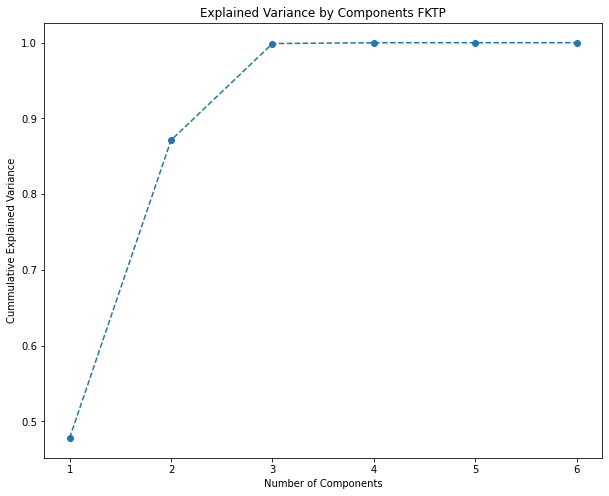

In [14]:
from matplotlib import*
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle='--')
plt.title('Explained Variance by Components FKTP')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Variance')


In [16]:
pca = PCA(n_components=3)
pca.fit(X_std)
final_principal = pca.transform(X_std)

In [22]:
# eigen value
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.47800185 0.39319926 0.12767146]


In [18]:
final_principal = pd.DataFrame(final_principal)

In [27]:
from numpy.core.defchararray import add

final_principal = final_principal.assign(new=add('', np.arange(1, len(final_principal) + 1).astype(str)))

In [28]:
final_principal

,0,1,2,new
0,0.503399,0.859365,0.311390,1
1,-0.149615,-0.130535,-0.164100,2
2,0.517903,-0.113737,-0.396761,3
3,-0.482975,-0.134992,-0.156028,4
4,-0.482758,-0.132831,-0.212568,5
...,...,...,...,...
906900,0.181684,-0.146669,0.346525,906901
906901,-0.148900,-0.123434,-0.352507,906902
906902,-0.483790,-0.143112,0.051388,906903
906903,-0.483675,-0.141968,0.023083,906904


In [29]:
final_principal.rename(columns = {0 : 'first_component_pca', 1 : 'second_component_pca', 2 : 'third_component_pca'}, inplace = True)

In [30]:
final_attribut = pd.concat([final_principal, final_component], axis=1)

In [31]:
final_attribut

,first_component_pca,second_component_pca,third_component_pca,new,first_component_mca,second_component_mca,third_component_mca,fourth_component_mca,fifth_component_mca,new
0,0.503399,0.859365,0.311390,1,-0.482193,-1.314366,-0.139377,0.234796,-0.534846,1
1,-0.149615,-0.130535,-0.164100,2,0.575586,-0.790547,-0.406820,0.198746,-2.191210,2
2,0.517903,-0.113737,-0.396761,3,-0.208762,-0.135072,-0.244325,0.042749,-1.485076,3
3,-0.482975,-0.134992,-0.156028,4,1.121162,-1.119388,-0.642665,0.297018,-0.591111,4
4,-0.482758,-0.132831,-0.212568,5,-0.482193,-1.314366,-0.139377,0.234796,-0.534846,5
...,...,...,...,...,...,...,...,...,...,...
906900,0.181684,-0.146669,0.346525,906901,-0.804672,-0.395274,0.146022,0.045020,0.129247,906901
906901,-0.148900,-0.123434,-0.352507,906902,-0.537710,0.208135,0.074359,-0.067534,-0.034734,906902
906902,-0.483790,-0.143112,0.051388,906903,-0.804672,-0.395274,0.146022,0.045020,0.129247,906903
906903,-0.483675,-0.141968,0.023083,906904,0.801939,-0.377441,-0.588152,0.182224,-0.235499,906904


In [32]:
final_attribut.drop(['new'], axis=1, inplace=True)

### ** K-Means**

Menentukan jumlah cluster dengan elbow method

In [33]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(final_attribut)
    kmeanModel.fit(final_attribut)
 
    distortions.append(sum(np.min(cdist(final_attribut, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / final_attribut.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(final_attribut, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / final_attribut.shape[0]
    mapping2[k] = kmeanModel.inertia_

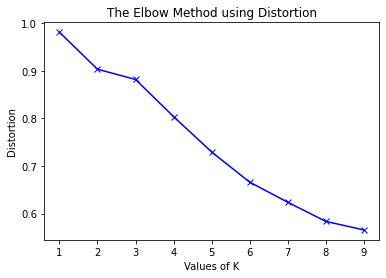

In [34]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### Davies Bouldin Score

1.0143836526486618
1.4031568357533162
1.1886725939755052
1.0379491271938477
0.9640936416191127
0.9543865556051895
1.0116167936237945


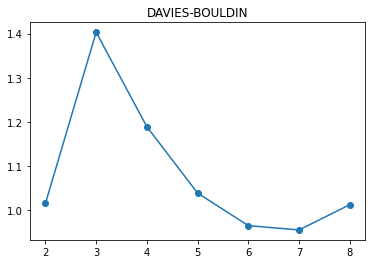

In [35]:
from sklearn.metrics import davies_bouldin_score
k = [2, 3, 4, 5, 6, 7, 8]
scores = []

for i in k:
    y_pred = KMeans(n_clusters = i, max_iter=1000, random_state = 43).fit_predict(final_attribut)
    score = davies_bouldin_score(final_attribut, y_pred)
    scores.append(score)
    print(score)

plt.plot(k, scores, 'o-')
plt.title('DAVIES-BOULDIN')
plt.show()

142300.6701869968
180917.28972794983
215098.68195516238
250729.58714332088
279448.4607147956
286986.84175662126
286967.4242053399


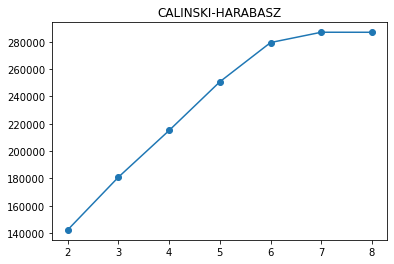

In [36]:
from sklearn.metrics import calinski_harabasz_score
k = [2, 3, 4, 5, 6, 7, 8]
scores = []
 
for i in k:
    y_pred = KMeans(n_clusters = i, max_iter=1000, random_state = 43).fit_predict(final_attribut)
    score = calinski_harabasz_score(final_attribut, y_pred)
    scores.append(score)
    print(score)
 
plt.plot(k, scores, 'o-')
plt.title('CALINSKI-HARABASZ')
plt.show()

[0.19117514129997115]
[0.19117514129997115, 0.192325536863597]
[0.19117514129997115, 0.192325536863597, 0.24027041652207834]
[0.19117514129997115, 0.192325536863597, 0.24027041652207834, 0.28582984876755396]
[0.19117514129997115, 0.192325536863597, 0.24027041652207834, 0.28582984876755396, 0.29968930413817624]
[0.19117514129997115, 0.192325536863597, 0.24027041652207834, 0.28582984876755396, 0.29968930413817624, 0.31659325129846977]
[0.19117514129997115, 0.192325536863597, 0.24027041652207834, 0.28582984876755396, 0.29968930413817624, 0.31659325129846977, 0.2944219466473602]


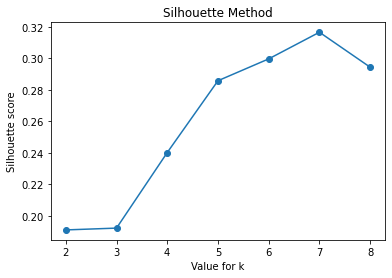

In [82]:
from sklearn.metrics import silhouette_score
k = [2, 3, 4, 5, 6, 7, 8]
score=[]
for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(final_attribut)
    score.append(silhouette_score(final_attribut,kmeans.labels_))
    print(score)
plt.plot(k, score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.title('Silhouette Method')
plt.show()

##### n=2

In [37]:
kmeans_pca_2 = KMeans(n_clusters = 2, init ='k-means++', random_state=42)

In [38]:
# fit data dengan model kmeans pca
kmeans_pca_2.fit(final_attribut)

KMeans(n_clusters=2, random_state=42)

In [39]:
kmeans_pca_2.inertia_

1003235.8110477375

#### n = 3

In [40]:
kmeans_pca = KMeans(n_clusters = 3, init ='k-means++', random_state=42)

In [41]:
# fit data dengan model kmeans pca
kmeans_pca.fit(final_attribut)

KMeans(n_clusters=3, random_state=42)

In [42]:
kmeans_pca.inertia_

845850.9789223014

#### n=4

In [43]:
kmeans_pca_4 = KMeans(n_clusters = 4, init ='k-means++', random_state=42)

In [44]:
# fit data dengan model kmeans pca
kmeans_pca_4.fit(final_attribut)

KMeans(n_clusters=4, random_state=42)

In [45]:
kmeans_pca_4.inertia_

688809.2332019248

#### n=5

In [46]:
kmeans_pca_5 = KMeans(n_clusters = 5, init ='k-means++', random_state=42)

In [47]:
# fit data dengan model kmeans pca
kmeans_pca_5.fit(final_attribut)

KMeans(n_clusters=5, random_state=42)

In [48]:
kmeans_pca_5.inertia_

561830.5858208629

#### n=6

In [49]:
kmeans_pca_6 = KMeans(n_clusters = 6, init ='k-means++', random_state=42)

In [50]:
# fit data dengan model kmeans pca
kmeans_pca_6.fit(final_attribut)

KMeans(n_clusters=6, random_state=42)

In [51]:
kmeans_pca_6.inertia_

465727.89136481046

#### n=7

In [52]:
kmeans_pca_7 = KMeans(n_clusters = 7, init ='k-means++', random_state=42)

In [53]:
# fit data dengan model kmeans pca
kmeans_pca_7.fit(final_attribut)

KMeans(n_clusters=7, random_state=42)

In [54]:
kmeans_pca_7.inertia_

408206.4717179679

#### n=8

In [55]:
kmeans_pca_8 = KMeans(n_clusters = 8, init ='k-means++', random_state=42)

In [56]:
# fit data dengan model kmeans pca
kmeans_pca_8.fit(final_attribut)

KMeans(random_state=42)

In [57]:
kmeans_pca_8.inertia_

368046.0551631919

Analisis Hasil

In [58]:
fkrtl_not_transform = pd.read_csv('E:/Mata Kuliah/Semester 8/TugasAkhir II/Week 15/Data/fkrtl_not_transformation.csv')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [136]:
fkrtl_segm_pca_kmeans = pd.concat([fkrtl_not_transform.reset_index(drop = True), pd.DataFrame(final_attribut)], axis = 1)
fkrtl_segm_pca_kmeans.columns.values[-8: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8']

fkrtl_segm_pca_kmeans['Cluster'] = kmeans_pca_6.labels_

In [139]:
fkrtl_segm_pca_kmeans['Segment'] = fkrtl_segm_pca_kmeans['Cluster'].map({0:'1', 1:'2', 2:'3', 3:'4', 4:'5', 5:'6'})

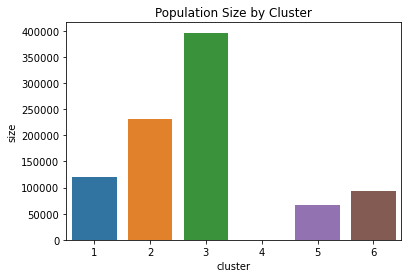

In [140]:
#Check size of each cluster - Are they all representative ?
import seaborn as sns
cluster_size = []
for centroid, cluster_df in fkrtl_segm_pca_kmeans.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('Population Size by Cluster')
plt.show()

In [142]:
fkrtl_segm_pca_kmeans['Segment'].value_counts()

3    396681
2    231065
1    120223
6     92716
5     66219
4         1
Name: Segment, dtype: int64

In [141]:
fkrtl_segm_pca_kmeans['Cluster'].value_counts()

2    396681
1    231065
0    120223
5     92716
4     66219
3         1
Name: Cluster, dtype: int64

In [65]:
fkrtl_segm_pca_kmeans.to_csv('E:/Mata Kuliah/Semester 8/TugasAkhir II/Week 16/Data/fkrtl_hasil_cluster_mca+pca_6.csv')

In [66]:
fkrtl_segm_pca_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906905 entries, 0 to 906904
Data columns (total 54 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              906905 non-null  int64  
 1   Hasil Rujukan FKTP?                     906905 non-null  object 
 2   provinsi perujuk sama?                  906905 non-null  object 
 3   kab/kota perujuk sama?                  906905 non-null  object 
 4   fkrtl-tanggal datang                    906905 non-null  object 
 5   fkrtl-tanggal pulang                    906905 non-null  object 
 6   fkrtl-Lama Kunjungan                    906905 non-null  int64  
 7   fkrtl-Hari Kunjungan                    906905 non-null  object 
 8   fkrtl-Weekend?                          906905 non-null  int64  
 9   fkrtl-Month                             906905 non-null  int64  
 10  fkrtl-Year                              9069

In [135]:
fkrtl_segm_pca_kmeans.drop(['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Cluster', 'Segment'], axis=1, inplace=True)

In [131]:
fkrtl_segm_pca_kmeans = pd.concat([fkrtl_not_transform.reset_index(drop = True), pd.DataFrame(final_attribut)], axis = 1)
fkrtl_segm_pca_kmeans.columns.values[-8: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8']

fkrtl_segm_pca_kmeans['Cluster'] = kmeans_pca_5.labels_

In [132]:
fkrtl_segm_pca_kmeans['Segment'] = fkrtl_segm_pca_kmeans['Cluster'].map({0:'1', 1:'2', 2:'3', 3:'4', 4:'5'})

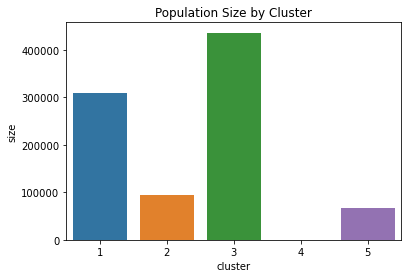

In [133]:
#Check size of each cluster - Are they all representative ?
import seaborn as sns
cluster_size = []
for centroid, cluster_df in fkrtl_segm_pca_kmeans.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('Population Size by Cluster')
plt.show()

In [134]:
fkrtl_segm_pca_kmeans['Segment'].value_counts()

3    435995
1    309313
2     95236
5     66360
4         1
Name: Segment, dtype: int64

In [74]:
fkrtl_segm_pca_kmeans['Cluster'].value_counts()

2    435995
0    309313
1     95236
4     66360
3         1
Name: Cluster, dtype: int64

In [75]:
fkrtl_segm_pca_kmeans.to_csv('E:/Mata Kuliah/Semester 8/TugasAkhir II/Week 16/Data/fkrtl_hasil_cluster_mca+pca_5.csv')

In [117]:
fkrtl_segm_pca_kmeans.drop(['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Cluster', 'Segment'], axis=1, inplace=True)

In [119]:
fkrtl_segm_pca_kmeans = pd.concat([fkrtl_not_transform.reset_index(drop = True), pd.DataFrame(final_attribut)], axis = 1)
fkrtl_segm_pca_kmeans.columns.values[-8: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8']

fkrtl_segm_pca_kmeans['Cluster'] = kmeans_pca.labels_

In [120]:
fkrtl_segm_pca_kmeans['Segment'] = fkrtl_segm_pca_kmeans['Cluster'].map({0:'1', 1:'2', 2:'3'})

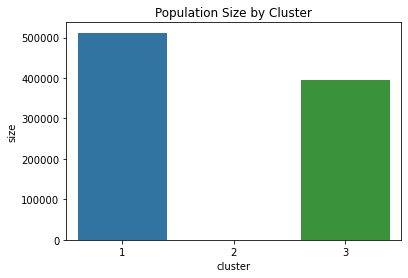

In [123]:
#Check size of each cluster - Are they all representative ?
import seaborn as sns
cluster_size = []
for centroid, cluster_df in fkrtl_segm_pca_kmeans.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('Population Size by Cluster')
plt.show()

In [124]:
fkrtl_segm_pca_kmeans['Cluster'].value_counts()

0    512001
2    394903
1         1
Name: Cluster, dtype: int64

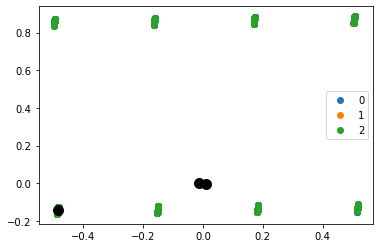

In [92]:
# Getting the Centroids
centroids = kmeans_pca.cluster_centers_
X = np.array(final_attribut)
label = kmeans_pca.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

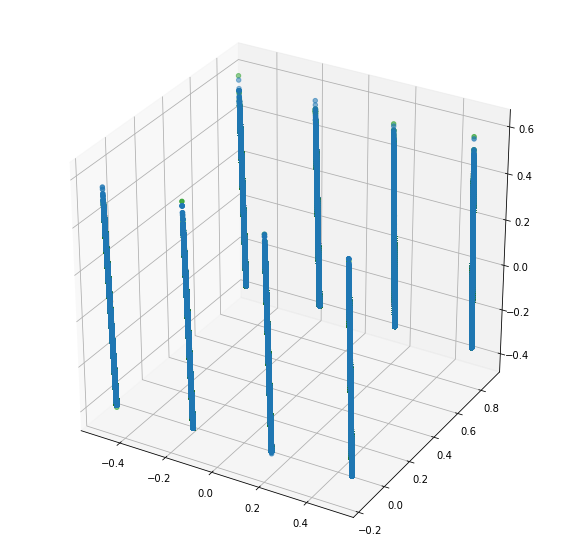

In [95]:
label = kmeans_pca.labels_
X = np.array(final_attribut)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])

In [94]:
fkrtl_segm_pca_kmeans.to_csv('E:/Mata Kuliah/Semester 8/TugasAkhir II/Week 16/Data/fkrtl_hasil_cluster_mca+pca_3.csv')

In [125]:
fkrtl_segm_pca_kmeans.drop(['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Cluster', 'Segment'], axis=1, inplace=True)

In [126]:
fkrtl_segm_pca_kmeans = pd.concat([fkrtl_not_transform.reset_index(drop = True), pd.DataFrame(final_attribut)], axis = 1)
fkrtl_segm_pca_kmeans.columns.values[-8: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8']

fkrtl_segm_pca_kmeans['Cluster'] = kmeans_pca_4.labels_

In [127]:
fkrtl_segm_pca_kmeans['Segment'] = fkrtl_segm_pca_kmeans['Cluster'].map({0:'1', 1:'2', 2:'3',3:'4'})

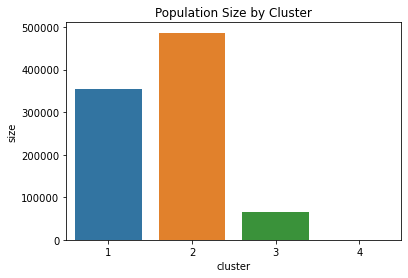

In [128]:
#Check size of each cluster - Are they all representative ?
import seaborn as sns
cluster_size = []
for centroid, cluster_df in fkrtl_segm_pca_kmeans.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('Population Size by Cluster')
plt.show()

In [100]:
fkrtl_segm_pca_kmeans['Cluster'].value_counts()

1    486841
0    353628
2     66435
3         1
Name: Cluster, dtype: int64

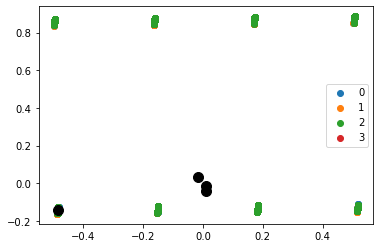

In [129]:
# Getting the Centroids
centroids = kmeans_pca_4.cluster_centers_
X = np.array(final_attribut)
label = kmeans_pca_4.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

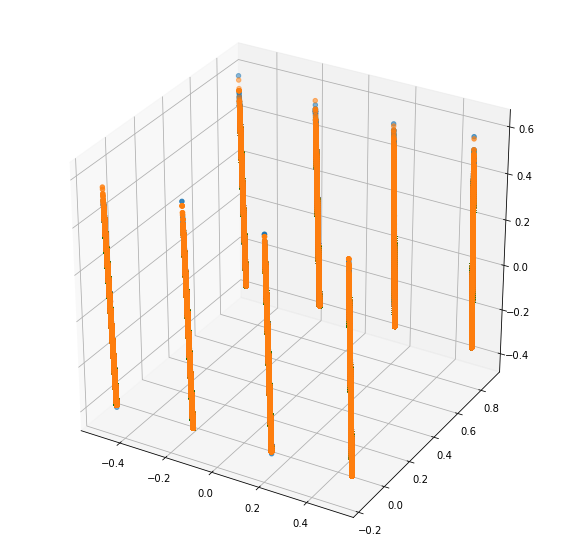

In [104]:
label = kmeans_pca_4.labels_
X = np.array(final_attribut)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])

In [103]:
fkrtl_segm_pca_kmeans.to_csv('E:/Mata Kuliah/Semester 8/TugasAkhir II/Week 16/Data/fkrtl_hasil_cluster_mca+pca_4.csv')

# VISUALISASI CLUSTER

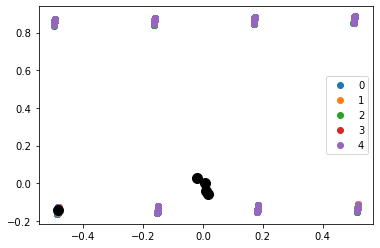

In [76]:
# Getting the Centroids
centroids = kmeans_pca_5.cluster_centers_
X = np.array(final_attribut)
label = kmeans_pca_5.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

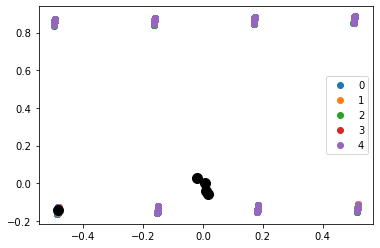

In [77]:
# Getting the Centroids
centroids = kmeans_pca_5.cluster_centers_
X = final_attribut.values
label = kmeans_pca_5.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

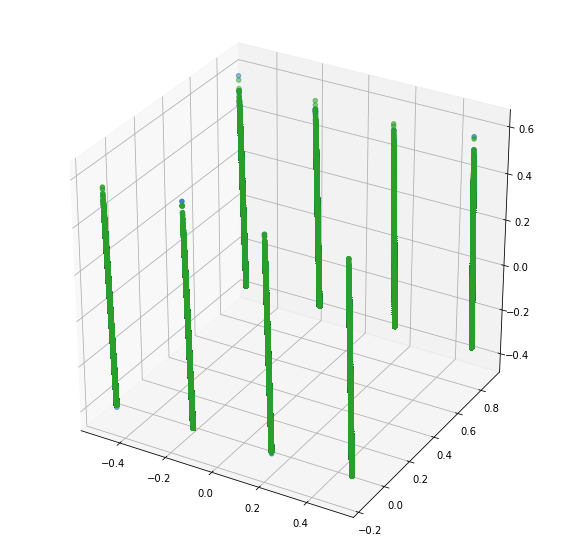

In [78]:
label = kmeans_pca_5.labels_
X = np.array(final_attribut)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])
ax.scatter(X[label == 4,0],X[label == 4,1],X[label == 4,2])
# ax.scatter(X[label == 5,0],X[label == 5,1],X[label == 5,2])
# ax.scatter(final_principal[label == 5,0],final_principal[label == 5,1],final_principal[label == 5,2])


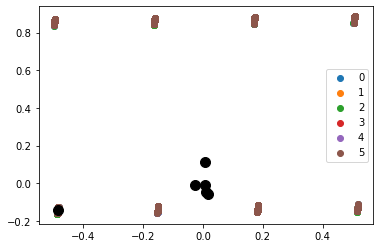

In [79]:
# Getting the Centroids
centroids = kmeans_pca_6.cluster_centers_
X = np.array(final_attribut)
label = kmeans_pca_6.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

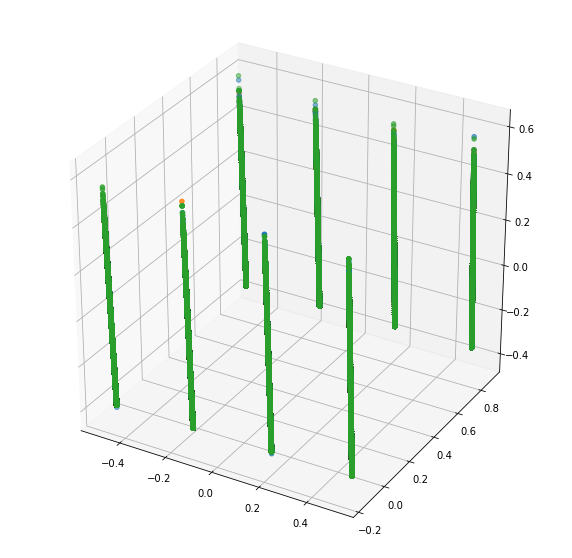

In [80]:
label = kmeans_pca_6.labels_
X = np.array(final_attribut)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])
ax.scatter(X[label == 4,0],X[label == 4,1],X[label == 4,2])
ax.scatter(X[label == 5,0],X[label == 5,1],X[label == 5,2])
# ax.scatter(final_principal[label == 5,0],final_principal[label == 5,1],final_principal[label == 5,2])


In [81]:
from sklearn.metrics import silhouette_score

print(silhouette_score(final_attribut, kmeans_pca_6.labels_))

0.29968577370350974
